In [16]:
# Test 1D solution of MT problem and compare to a analytic solution
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
# import the simpegMT module
from simpegMT.Utils import MT1Danalytic, MT1Dsolutions
import SimPEG as simpeg
from scipy.constants import mu_0
def omega(freq):
    """Change frequency to angular frequency, omega"""
    return 2.*np.pi*freq

In [18]:
# Set up the mesh.
freq = 10
z = 100.
hz = [(z,10,-1.5),(z,10),(z,10,1.5)]
M = simpeg.Mesh.TensorMesh([hz],'C')
# sig = np.zeros(M.nC) + 1e-8
conds = [1,1e-2]
elev = 300
sig = np.zeros(M.nC) + conds[1]
sig[np.logical_and(M.gridCC>-200,M.gridCC<0)] = conds[0]
sig[M.gridCC>elev] = 1e-8
sig[M.gridCC<-500] = 1e-1
sig[M.gridCC<-900] = conds[1]

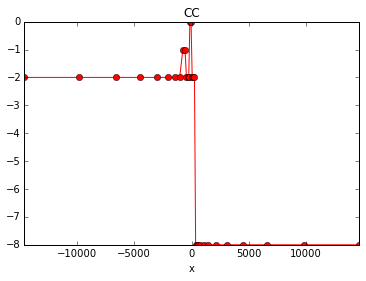

In [19]:
M.plotImage(log10(sig))

In [20]:
M.vectorNx

array([-17499.51171875, -11733.0078125 ,  -7888.671875  ,  -5325.78125   ,
        -3617.1875    ,  -2478.125     ,  -1718.75      ,  -1212.5       ,
         -875.        ,   -650.        ,   -500.        ,   -400.        ,
         -300.        ,   -200.        ,   -100.        ,      0.        ,
          100.        ,    200.        ,    300.        ,    400.        ,
          500.        ,    650.        ,    875.        ,   1212.5       ,
         1718.75      ,   2478.125     ,   3617.1875    ,   5325.78125   ,
         7888.671875  ,  11733.0078125 ,  17499.51171875])

In [21]:
# Get the fields
anaEd, anaEu, anaHd, anaHu = MT1Danalytic.getEHfields(M,sig,freq,M.vectorNx)
anaEtemp = (anaEd+anaEu)
anaHtemp = (anaHd+anaHu)
# Scale the solution
anaZ = (anaEtemp/anaHtemp)[np.argmin(M.vectorNx**2)]
anaEcor = anaEtemp/anaEtemp[-1] #.real/np.abs(anaEtemp[-1].real)+1j*anaEtemp.imag/np.abs(anaEtemp[-1].imag)
anaHcor = anaHtemp/anaEtemp[-1] # .real/np.abs(anaEtemp[-1].real)+1j*anaHtemp.imag/np.abs(anaEtemp[-1].imag)

solE = MT1Dsolutions.get1DEfields(M,sig,freq,sourceAmp=1).conj()
solH = -M.nodalGrad*solE/(1j*omega(freq)*mu_0)

In [22]:
anaEtemp[-1]

(12836609.712174654+24128916.329733729j)

In [23]:
np.hstack((simpeg.mkvc(anaEcor,2),simpeg.mkvc(solE,2)))

array([[  1.71846041e-08 -3.23018213e-08j,
          1.71846041e-08 +3.23018213e-08j],
       [ -1.13091973e-06 +7.74148973e-07j,
         -5.08843373e-07 -3.09514912e-07j],
       [  3.71261251e-06 -1.48868560e-05j,
          3.65512026e-06 -7.95948811e-06j],
       [  7.37072093e-05 +2.15078894e-05j,
          5.80305408e-05 +1.06357942e-05j],
       [  4.75612845e-05 +2.19547586e-04j,
          6.36366910e-05 +1.90231770e-04j],
       [ -2.21258264e-04 +4.02750922e-04j,
         -1.76226223e-04 +3.91452069e-04j],
       [ -6.14770210e-04 +4.12789798e-04j,
         -5.58922388e-04 +4.25303107e-04j],
       [ -9.80056634e-04 +2.74642565e-04j,
         -9.21632381e-04 +3.06492631e-04j],
       [ -1.25588450e-03 +7.69129746e-05j,
         -1.19789524e-03 +1.23674848e-04j],
       [ -1.43995677e-03 -3.53489427e-04j,
         -1.41049571e-03 -2.73526014e-04j],
       [ -1.49344998e-03 -9.54835366e-04j,
         -1.49148850e-03 -8.51549869e-04j],
       [ -1.48131966e-03 -1.44956637e-03j,


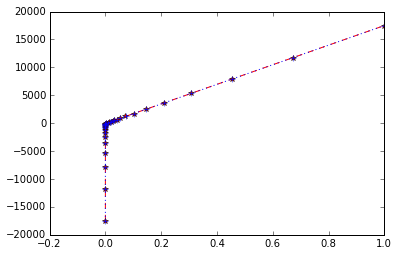

In [24]:
plot(solE.real,M.vectorNx,'r*--',anaEcor.real,M.vectorNx,'b+:')
#axis([-.2,.2,-10000,10000])

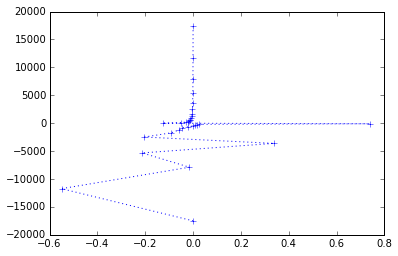

In [25]:
plot((abs(solE.real)-abs(anaEcor.real))/abs(anaEcor.real),M.vectorNx,'b+:')

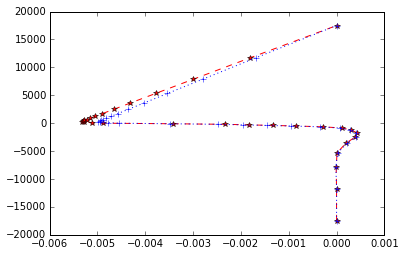

In [26]:
plot(solE.imag,M.vectorNx,'r*--',anaEcor.imag,M.vectorNx,'b+:')

/home/gudni/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


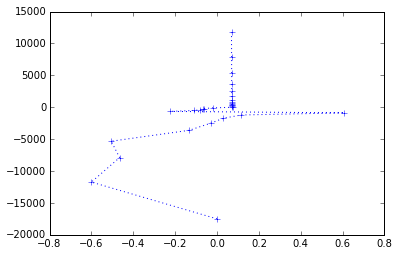

In [27]:
plot((abs(solE.imag)-abs(anaEcor.imag))/abs(anaEcor.imag),M.vectorNx,'b+:')

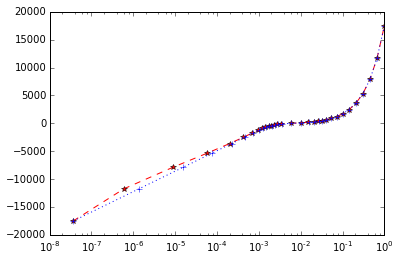

In [28]:
semilogx(abs(solE),M.vectorNx,'r*--',abs(anaEcor),M.vectorNx,'b+:')

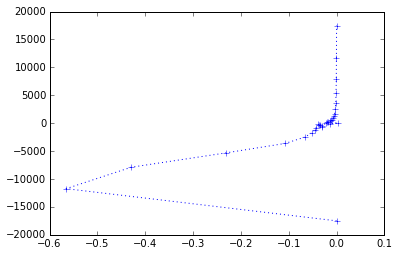

In [29]:
plot((abs(solE)-abs(anaEcor))/abs(anaEcor),M.vectorNx,'b+:')

In [30]:
def appResPhs(freq,z):
    app_res = ((1./(8e-7*np.pi**2))/freq)*np.abs(z)**2
    app_phs = np.arctan2(z.imag,z.real)*(180/np.pi)
    return app_res, app_phs
app_rAna, app_pAna = appResPhs(freq,anaZ)
app_rSol, app_pSol = appResPhs(freq,solE[np.argmin(M.hx**2)]/solH[np.argmin(M.hx**2)])
print app_rAna, app_pAna
print app_rSol, app_pSol

0.849336540898 41.0291116761
10.1269411518 -150.251552846


In [31]:
M.nodalGrad.dot(solE).shape

(30,)

In [32]:
M.nN


31

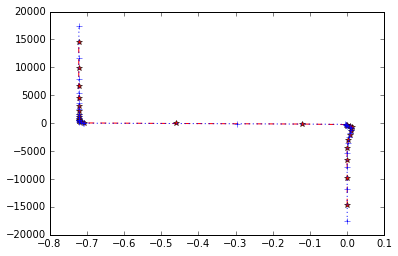

In [33]:
plot(-solH.imag,M.vectorCCx,'r*--',anaHcor.imag,M.vectorNx,'b+:')


In [34]:
M.vectorCCx

array([-14616.25976562,  -9810.83984375,  -6607.2265625 ,  -4471.484375  ,
        -3047.65625   ,  -2098.4375    ,  -1465.625     ,  -1043.75      ,
         -762.5       ,   -575.        ,   -450.        ,   -350.        ,
         -250.        ,   -150.        ,    -50.        ,     50.        ,
          150.        ,    250.        ,    350.        ,    450.        ,
          575.        ,    762.5       ,   1043.75      ,   1465.625     ,
         2098.4375    ,   3047.65625   ,   4471.484375  ,   6607.2265625 ,
         9810.83984375,  14616.25976562])